In [0]:
%tensorflow_version 1.x
import matplotlib.pyplot as plt
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import cv2
import numpy as np 
from tensorflow.python.framework import graph_util
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split

In [106]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
data1='/content/drive/My Drive/fintest/1coal'
data2='/content/drive/My Drive/fintest/2coal'
data3='/content/drive/My Drive/fintest/3coal'

In [0]:
def data_with_label():
    images=[]
    cnt = 0
    for i in tqdm(os.listdir(data1)):
        path=os.path.join(data1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        images.append([np.array(img),np.array([1,0,0])])
    cnt = 0
    for i in tqdm(os.listdir(data2)):
        path=os.path.join(data2,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        images.append([np.array(img),np.array([0,1,0])])
    cnt = 0
    for i in tqdm(os.listdir(data3)):
        path=os.path.join(data3,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        images.append([np.array(img),np.array([0,0,1])])

    return images

In [110]:
data = data_with_label()

100%|██████████| 446/446 [07:50<00:00,  1.06s/it]


In [0]:
import random
random.shuffle(data)
train_data, test_data = train_test_split(data, test_size=0.2)

In [0]:
tr_img_data = np.array([i[0] for i in train_data]).reshape(-1,64,64,1)
tr_img_data = tr_img_data/255
tr_lbl_data = np.array([i[1] for i in train_data])
tst_img_data = np.array([i[0] for i in test_data]).reshape(-1,64,64,1)
tst_img_data = tst_img_data/255
tst_lbl_data = np.array([i[1] for i in test_data])

In [149]:
from keras.regularizers import l2
model=Sequential()
model.add(InputLayer(input_shape=[64,64,1]))

model.add(Conv2D(filters=16,kernel_size=3,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01),strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=3,padding='same'))
          
model.add(Conv2D(filters=16,kernel_size=3,strides=2,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=3,padding='same'))         

model.add(Flatten())

model.add(Dense(2048,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01),activation='relu'))
model.add(Dropout(0.80))

model.add(Dense(512,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01),activation='relu'))
model.add(Dropout(0.70))
model.add(Dense(3,activation='softmax'))
optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
          
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=tr_img_data,y=tr_lbl_data,epochs=200,batch_size=32,validation_data=(tst_img_data, tst_lbl_data),shuffle=True)
model.summary()

Train on 908 samples, validate on 227 samples
Epoch 1/200
908/908 [==============================] - 2s 2ms/step - loss: 2.3355 - accuracy: 0.3425 - val_loss: 2.2521 - val_accuracy: 0.3921
Epoch 2/200
908/908 [==============================] - 0s 466us/step - loss: 2.2066 - accuracy: 0.3778 - val_loss: 2.1468 - val_accuracy: 0.3921
Epoch 3/200
908/908 [==============================] - 0s 484us/step - loss: 2.1107 - accuracy: 0.4064 - val_loss: 2.0558 - val_accuracy: 0.3921
Epoch 4/200
908/908 [==============================] - 0s 473us/step - loss: 2.0255 - accuracy: 0.3888 - val_loss: 1.9772 - val_accuracy: 0.3921
Epoch 5/200
908/908 [==============================] - 0s 481us/step - loss: 1.9490 - accuracy: 0.3899 - val_loss: 1.9084 - val_accuracy: 0.3921
Epoch 6/200
908/908 [==============================] - 0s 475us/step - loss: 1.8789 - accuracy: 0.3954 - val_loss: 1.8479 - val_accuracy: 0.3921
Epoch 7/200
908/908 [==============================] - 0s 483us/step - loss: 1.8170 - 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


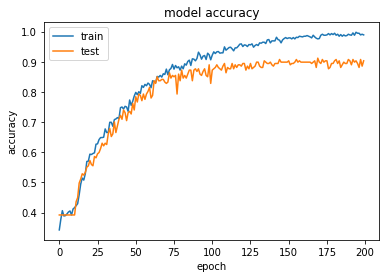

In [151]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])#,history.history['val_acc'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


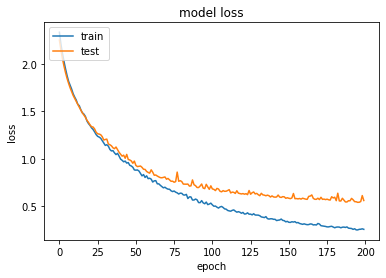

In [152]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()